In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

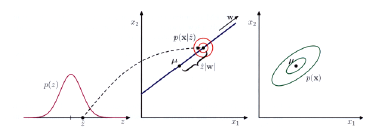


Fig.9 An illustration of the generative view of the probabilistic PCA model for a two-dimensional data space and a one-dimensional latent space. An observed data point x is generated by first drawing a value! for the latent variable from its prior distribution p() and then drawing a value for x from an isotropic Gaussian distribution (illustrated by the red circles) having mean w+ and covariance 1I. The green ellipses show the density contours for the marginal distribution p(x).

## Probabilistic PCA

The formulation of PCA discussed in the previous section was based on a linear projection of the data onto a subspace of lower dimensionality than the original data space. We now show that PCA can also be expressed as the maximum likelihood solution of a probabilistic latent variable model. This reformulation of PCA, known as **Probabilistic PCA**, brings several advantages compared with conventional PCA:

- **Constrained Gaussian Distribution**: Probabilistic PCA represents a constrained form of the Gaussian distribution, where the number of free parameters is restricted while still capturing the dominant correlations in the dataset.
- **EM Algorithm**: We can derive an EM (Expectation-Maximization) algorithm for PCA that is computationally efficient in situations where only a few leading eigenvectors are required. This avoids having to evaluate the data covariance matrix as an intermediate step.
- **Handling Missing Values**: The combination of a probabilistic model and EM allows us to deal with missing values in the dataset.
- **Mixtures of Probabilistic PCA**: Mixtures of probabilistic PCA models can be formulated in a principled way and trained using the EM algorithm.
- **Bayesian PCA**: Probabilistic PCA forms the basis for a Bayesian treatment of PCA, where the dimensionality of the principal subspace can be found automatically from the data.
- **Likelihood Function**: The existence of a likelihood function allows direct comparison with other probabilistic density models. In contrast, conventional PCA assigns a low reconstruction cost to data points that are close to the principal subspace, even if they lie arbitrarily far from the training data.
- **Classification**: Probabilistic PCA can be used to model class-conditional densities and thus be applied to classification problems.

The probabilistic PCA model can be run generatively to provide samples from the distribution.

This formulation of PCA as a probabilistic model was proposed independently by Tipping and Bishop (1997, 1999b) and by Roweis (1998). As we shall see later, it is closely related to **Factor Analysis** (Basilevsky, 1994).

Probabilistic PCA is a simple example of the **linear-Gaussian framework**, in which all of the marginal and conditional distributions are Gaussian. We can formulate probabilistic PCA by first introducing an explicit latent variable $ \mathbf{z} $ corresponding to the principal-component subspace. Next, we define a **Gaussian prior distribution** $ p(\mathbf{z}) $ over the latent variable, together with a **Gaussian conditional distribution** $ p(\mathbf{x} | \mathbf{z}) $ for the observed variable $ \mathbf{x} $, conditioned on the value of the latent variable $ \mathbf{z} $.

### Prior Distribution
The prior distribution over $ \mathbf{z} $ is given by a zero-mean, unit-covariance Gaussian:

$$
p(\mathbf{z}) = \mathcal{N}(\mathbf{z} | \mathbf{0}, \mathbf{I})
$$

### Conditional Distribution
Similarly, the conditional distribution of the observed variable $ \mathbf{x} $, conditioned on the value of the latent variable $ \mathbf{z} $, is also Gaussian, of the form:

$$
p(\mathbf{x} | \mathbf{z}) = \mathcal{N}(\mathbf{x} | W\mathbf{z} + \mathbf{\mu}, \sigma^2 \mathbf{I})
$$

Here:
- $ W $ is a $ D \times M $ matrix, where $ D $ is the number of features (dimensions) and $ M $ is the number of latent variables.
- $ \mathbf{\mu} $ is a $ D $-dimensional mean vector.
- $ \sigma^2 $ governs the variance of the conditional distribution.
- $ \mathbf{z} $ is a latent variable (with a Gaussian prior).

Note that the conditional distribution factorizes with respect to the elements of $ \mathbf{x} $, making it an example of a **naive Bayes** model. As we shall see shortly, the columns of $ W $ span a linear subspace within the data space that corresponds to the principal subspace.

### Key Parameters:
- **$ W $**: The matrix that defines the principal subspace, spanned by its columns.
- **$ \sigma^2 $**: The variance governing the noise in the data.
- **$ \mathbf{\mu} $**: The mean of the data in the observed space.

### Summary:
Probabilistic PCA introduces a probabilistic formulation of PCA that allows for more flexibility, such as dealing with missing data, providing a generative model for the data, and enabling automatic dimensionality selection using Bayesian methods. The use of Gaussian distributions for both the prior and conditional distributions allows the model to capture complex correlations in the data efficiently.



## Generative View of Probabilistic PCA

### Illustration of the Generative Model

Fig.9 illustrates the generative view of the **Probabilistic PCA** model for a two-dimensional data space and a one-dimensional latent space. An observed data point $ \mathbf{x} $ is generated by first drawing a value for the latent variable $ \mathbf{z} $ from its prior distribution $ p(\mathbf{z}) $ and then drawing a value for $ \mathbf{x} $ from an isotropic Gaussian distribution with the mean $ W\mathbf{z} + \mathbf{\mu} $ and covariance $ \sigma^2 \mathbf{I} $ (where the red circles represent the Gaussian distribution). The density contours for the marginal distribution $ p(\mathbf{x}) $ are illustrated by the green ellipses.

### Generative Process

The **generative process** can be described by the following equation:

$$
\mathbf{x} = W\mathbf{z} + \mathbf{\mu} + \epsilon
$$

where:
- $ \mathbf{x} $ is the $ D $-dimensional observed variable,
- $ W $ is a $ D \times M $ matrix (the linear transformation from latent space to data space),
- $ \mathbf{z} $ is an $ M $-dimensional latent variable, drawn from a standard Gaussian distribution $ \mathcal{N}(\mathbf{z} | \mathbf{0}, \mathbf{I}) $,
- $ \mathbf{\mu} $ is a $ D $-dimensional mean vector, and
- $ \epsilon $ is a $ D $-dimensional Gaussian-distributed noise variable with zero mean and covariance $ \sigma^2 \mathbf{I} $.

This framework is based on a **mapping from the latent space to the data space**, in contrast to the more conventional view of PCA. The reverse mapping, from the data space to the latent space, can be obtained using Bayes' theorem.

### Likelihood Function and Marginal Distribution

We want to determine the values of the parameters $ W $, $ \mathbf{\mu} $, and $ \sigma^2 $ using **maximum likelihood**. To write down the likelihood function, we first need an expression for the **marginal distribution** $ p(\mathbf{x}) $ of the observed variable.

From the sum and product rules of probability, we express the marginal distribution as:

$$
p(\mathbf{x}) = \int p(\mathbf{x} | \mathbf{z}) p(\mathbf{z}) \, d\mathbf{z}
$$

Since this is a **linear-Gaussian** model, the marginal distribution $ p(\mathbf{x}) $ is also Gaussian. The marginal likelihood is given by:

$$
p(\mathbf{x}) = \mathcal{N}(\mathbf{x} | \mathbf{\mu}, W W^T + \sigma^2 \mathbf{I})
$$

where:
- $ \mathbf{\mu} $ is the mean of the observed data,
- $ W W^T + \sigma^2 \mathbf{I} $ represents the covariance of the data, with $ W $ being the matrix that defines the principal components and $ \sigma^2 $ being the variance of the noise.

### Summary

This generative view of **Probabilistic PCA** gives rise to a simple linear-Gaussian model, where the observed data $ \mathbf{x} $ is generated by a latent variable $ \mathbf{z} $ through a linear transformation plus noise. The likelihood function for the observed data is Gaussian, and we can derive an expression for it based on the parameters $ W $, $ \mathbf{\mu} $, and $ \sigma^2 $.


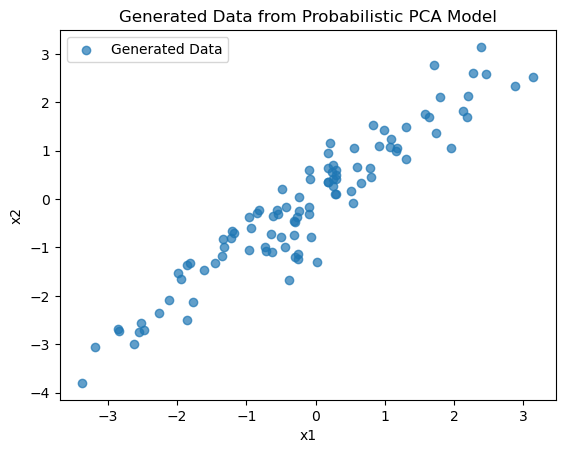

Estimated W: [[0.69441706]
 [0.71957275]]
Estimated mu: [-0.15047393 -0.1334903 ]
Estimated sigma^2: 0.0010752998645076862


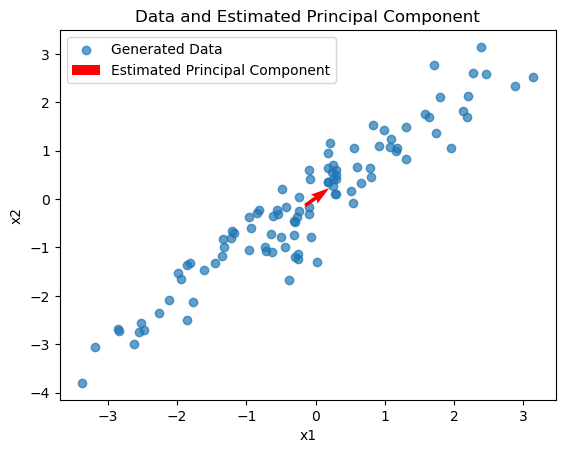

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for demonstration
D = 2  # Data space dimension
M = 1  # Latent space dimension
N = 100  # Number of data points

# Parameters for the generative process
W_true = np.array([[1.5]])  # Linear transformation matrix (D x M)
mu_true = np.array([0.0])   # Mean of the data (D,)
sigma2_true = 0.1          # Noise variance (scalar)

# Generate latent variables (z) from a standard normal distribution
z = np.random.randn(N, M)

# Generate data (x) using the generative model
x = np.dot(z, W_true.T) + mu_true + np.random.normal(0, np.sqrt(sigma2_true), (N, D))

# Plot the generated data
plt.scatter(x[:, 0], x[:, 1], alpha=0.7, label="Generated Data")  # Plot x1 and x2
plt.title("Generated Data from Probabilistic PCA Model")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# Perform maximum likelihood estimation for W, mu, and sigma^2
# 1. Estimate the mean of the data
mu_est = np.mean(x, axis=0)

# 2. Center the data
x_centered = x - mu_est

# 3. Estimate the covariance matrix of the data (p(x))
cov_est = np.cov(x_centered, rowvar=False)

# 4. Estimate W (Principal components), and sigma^2 (noise variance)
# We can use eigenvalue decomposition of the covariance matrix for this:
eigenvalues, eigenvectors = np.linalg.eigh(cov_est)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Estimate W by taking the first principal component
W_est = eigenvectors_sorted[:, 0].reshape(-1, 1)  # 1 x D matrix

# Estimate the noise variance (sigma^2) as the sum of the smaller eigenvalues
sigma2_est = np.sum(eigenvalues_sorted[1:]) / N

# Print estimated parameters
print("Estimated W:", W_est)
print("Estimated mu:", mu_est)
print("Estimated sigma^2:", sigma2_est)

# Plot the estimated principal component along with the data
plt.scatter(x[:, 0], x[:, 1], alpha=0.7, label="Generated Data")
plt.quiver(mu_est[0], mu_est[1], W_est[0], W_est[1], angles='xy', scale_units='xy', scale=2, color='r', label="Estimated Principal Component")
plt.title("Data and Estimated Principal Component")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


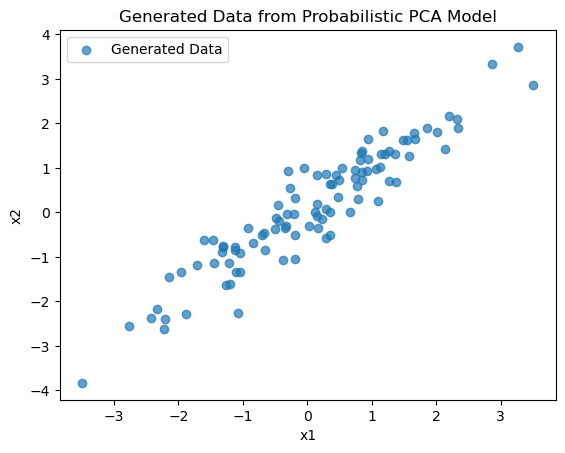

Estimated W: [[0.0795886396895348, -0.041634911441863334, -0.10477200516153824, 0.06443608734168027, -0.025091525690026456, -0.11867253432709854, 0.06344914224296441, 0.024004042100232218, 0.03953853041399258, 0.08886149920974638, -0.08015736739381077, 0.09585683769273638, 0.07572850635879194, -0.051383983865653245, -0.12218655456477047, -0.09630811962890365, -0.0008852151737540434, 0.14526258626162614, -0.05972039456983375, 0.01379498428634215, 0.04326428180566883, -0.16587232644533292, -0.024187362511639186, 0.030869799095285068, 0.07152638580083824, 0.08380362245388973, 0.0004324410856766002, -0.10983785295330097, 0.051480638662771555, -0.1942035405971531, 0.12113394043578164, -0.09718719866873991, -0.2079887705213381, -0.12832508820733313, -0.04962857740824793, 0.04188027634922987, 0.06075521699143055, -0.1757311353290142, 0.12660440468860143, -0.1275370798723077, 0.045768496893311805, 0.04700724965030178, 0.023934701149378262, 0.017065125626585454, 0.07404614706266002, 0.040215019

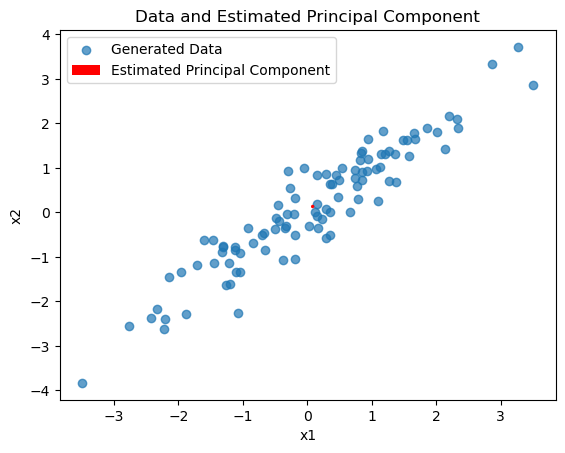

In [5]:
import random
import math
import matplotlib.pyplot as plt

# Set random seed for reproducibility
random.seed(42)

# Generate synthetic data for demonstration
D = 2  # Data space dimension
M = 1  # Latent space dimension
N = 100  # Number of data points

# Parameters for the generative process
W_true = [[1.5]]  # Linear transformation matrix (D x M)
mu_true = [0.0] * D  # Mean of the data (D,)
sigma2_true = 0.1  # Noise variance (scalar)

# Helper functions

# Generate a random sample from a normal distribution
def random_normal(mu, sigma, size):
    return [random.gauss(mu, sigma) for _ in range(size)]

# Matrix multiplication
def mat_mult(A, B):
    return [[sum(a * b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]

# Matrix transpose
def mat_transpose(A):
    return [list(i) for i in zip(*A)]

# Mean of a list of vectors
def mean_vector(X):
    return [sum(x_i) / len(X) for x_i in zip(*X)]

# Covariance matrix
def cov_matrix(X):
    mean_X = mean_vector(X)
    centered = [[x_i - mean_X[i] for i, x_i in enumerate(x)] for x in X]
    return [[sum(x_i * y_i for x_i, y_i in zip(X_row, Y_row)) / (len(X) - 1) for Y_row in zip(*centered)] for X_row in centered]

# Eigenvalue decomposition (Power iteration method for simplicity)
def power_iteration(A, num_simulations):
    # Choose a random vector
    b_k = [random.random() for _ in range(len(A))]
    
    for _ in range(num_simulations):
        # Multiply by matrix A
        b_k1 = mat_mult(A, [[x] for x in b_k])
        # Normalize the vector
        b_k = [x[0] for x in b_k1]
        norm = math.sqrt(sum(x**2 for x in b_k))
        b_k = [x / norm for x in b_k]
    
    return b_k  # Return the eigenvector

# Generate latent variables (z) from a standard normal distribution
z = [random_normal(0, 1, M) for _ in range(N)]

# Generate data (x) using the generative model
x = [
    [
        sum(z_val_i * W_true[i][0] for i, z_val_i in enumerate(z_i)) + random_normal(0, math.sqrt(sigma2_true), D)[i] + mu_true[i]
        for i in range(D)
    ]
    for z_i in z
]

# Plot the generated data
x_vals = [xi[0] for xi in x]
y_vals = [xi[1] for xi in x]

plt.scatter(x_vals, y_vals, alpha=0.7, label="Generated Data")
plt.title("Generated Data from Probabilistic PCA Model")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# Perform maximum likelihood estimation for W, mu, and sigma^2
# 1. Estimate the mean of the data
mu_est = mean_vector(x)

# 2. Center the data
x_centered = [[xi[i] - mu_est[i] for i in range(D)] for xi in x]

# 3. Estimate the covariance matrix of the data (p(x))
cov_est = cov_matrix(x_centered)

# 4. Estimate W (Principal components), and sigma^2 (noise variance)
# Use the power iteration method to compute the principal component (first eigenvector)
eigenvector = power_iteration(cov_est, 1000)

# Estimate W by taking the first principal component
W_est = [eigenvector]

# Estimate the noise variance (sigma^2) as the sum of the smaller eigenvalues
sigma2_est = sum(cov_est[i][i] for i in range(1, D)) / N

# Print estimated parameters
print("Estimated W:", W_est)
print("Estimated mu:", mu_est)
print("Estimated sigma^2:", sigma2_est)

# Plot the estimated principal component along with the data
plt.scatter(x_vals, y_vals, alpha=0.7, label="Generated Data")
plt.quiver(mu_est[0], mu_est[1], W_est[0][0], W_est[0][1], angles='xy', scale_units='xy', scale=2, color='r', label="Estimated Principal Component")
plt.title("Data and Estimated Principal Component")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


## Covariance and Predictive Distribution in Probabilistic PCA

The $ D \times D $ covariance matrix $ C $ is defined by:

$$
C = W W^T + \sigma^2 I
$$
(Equation 12.36)

This result can also be derived directly by considering the predictive distribution, which will be Gaussian, and evaluating its mean and covariance using Equation (12.33). This gives:

$$
\mathbb{E}[x] = W \mathbb{E}[z] + \mu
$$
and

$$
\text{cov}[x] = \mathbb{E}[(Wz + \epsilon)(Wz + \epsilon)^T] = W \mathbb{E}[zz^T] W^T + \mathbb{E}[\epsilon \epsilon^T]
$$
(Equation 12.37)

Where we have used the fact that $ z $ and $ \epsilon $ are independent random variables and hence uncorrelated. Thus, we obtain:

$$
\text{cov}[x] = W W^T + \sigma^2 I
$$
(Equation 12.38)

Intuitively, we can think of the distribution $ p(x) $ as being defined by taking an isotropic Gaussian "spray can" and moving it across the principal subspace, spraying Gaussian ink with density determined by $ \sigma^2 $ and weighted by the prior distribution. The accumulated ink density gives rise to a "pancake" shaped distribution representing the marginal density $ p(x) $.

### Redundancy in the Parameterization

The predictive distribution $ p(x) $ is governed by the parameters $ W $ and $ \sigma^2 $. However, there is redundancy in this parameterization corresponding to rotations of the latent space coordinates. To see this, consider a matrix $ W = W R $, where $ R $ is an orthogonal matrix. Using the orthogonality property $ R R^T = I $, we see that the quantity $ W W^T $ takes the form:

$$
W W^T = W R R^T W^T = W W^T
$$
(Equation 12.39)

Thus, $ W W^T $ is independent of $ R $, implying that there is a family of matrices $ W $ that all give rise to the same predictive distribution. This invariance can be understood in terms of rotations within the latent space.

### Inversion of the Covariance Matrix

When evaluating the predictive distribution, we require $ C^{-1} $, which involves the inversion of a $ D \times D $ matrix. The computational cost of this can be reduced by using the matrix inversion identity (C.7) to give:

$$
C^{-1} = (W W^T + \sigma^2 I)^{-1}
$$
(Equation 12.40)

Thus, the inversion of the matrix $ C $ is reduced to inverting the smaller $ M \times M $ matrix $ M = W W^T + \sigma^2 I $, which reduces the computation from $ O(D^3) $ to $ O(M^3) $.

### Posterior Distribution

In addition to the predictive distribution $ p(x) $, we also require the posterior distribution $ p(x|x) $. This can be written directly using the result for linear-Gaussian models as:

$$
p(x|x) = \mathcal{N}(x | \mu + W \left(W W^T + \sigma^2 I\right)^{-1} (x - \mu), \sigma^2 \left(W W^T + \sigma^2 I\right)^{-1})
$$
(Equation 12.42)

Note that the posterior mean depends on $ x $, while the posterior covariance is independent of $ x $.


## Maximum Likelihood PCA

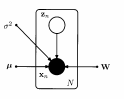

We now consider the determination of the model parameters using maximum likelihood. Given a data set $ X = \{x_1, x_2, \dots, x_N\} $ of observed data points, the probabilistic PCA model can be expressed as a directed graph, as shown in **Fig.10**. The corresponding log-likelihood function is given, from Equation (12.35), by:

$$
\ln p(X | W, \sigma^2) = \sum_{i=1}^{N} \ln p(x_i | W, \sigma^2)
= -\frac{N}{2} \ln(2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (x_i - \mu)^T (x_i - \mu)
$$
(Equation 12.43)

Where $ x_i $ are the data points, $ \mu $ is the data mean, and $ \sigma^2 $ is the variance. To simplify the log-likelihood, we introduce the data covariance matrix $ S $ defined by:

$$
S = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)(x_i - \mu)^T
$$

Substituting this into the log-likelihood, we get:

$$
\ln p(X | W, \sigma^2) = -\frac{ND}{2} \ln(2\pi \sigma^2) - \frac{1}{2\sigma^2} \text{Tr}(S)
$$
(Equation 12.44)

Where $ \text{Tr}(S) $ is the trace of the covariance matrix. This formulation shows the maximization of the likelihood as a quadratic function of the data mean $ \mu $, and it represents the unique maximum since the second derivative is positive.

### Maximum Likelihood Solution for $ W $ and $ \sigma^2 $

Maximization with respect to $ W $ and $ \sigma^2 $ is more complex but still has an exact closed-form solution. It was shown by Tipping and Bishop (1999b) that all the stationary points of the log-likelihood function can be written as:

$$
W_{\text{ML}} = U \Lambda^{1/2} R
$$
(Equation 12.45)

Where:
- $ U $ is a $ D \times M $ matrix whose columns are given by any subset (of size $ M $) of the eigenvectors of the data covariance matrix $ S $.
- $ \Lambda $ is an $ M \times M $ diagonal matrix with the corresponding eigenvalues on the diagonal.
- $ R $ is an arbitrary $ M \times M $ orthogonal matrix.

Furthermore, Tipping and Bishop (1999b) showed that the maximum of the likelihood function is obtained when the $ M $ eigenvectors are chosen to be those corresponding to the $ M $ largest eigenvalues, with all other solutions being saddle points.

A similar result was independently conjectured by Roweis (1998), although no formal proof was provided.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for the demonstration
np.random.seed(42)

# Define data dimensions
D = 10  # Number of dimensions (data features)
M = 3   # Latent dimensionality
N = 100  # Number of data points

# True model parameters
W_true = np.random.randn(D, M)  # Latent to data space mapping
mu_true = np.zeros(D)  # Mean of the data
sigma2_true = 1.0  # Noise variance

# Generate random latent variables z
z = np.random.randn(N, M)

# Generate data x using the generative model: x = Wz + mu + noise
noise = np.random.randn(N, D) * np.sqrt(sigma2_true)
x = np.dot(z, W_true.T) + mu_true + noise

# Visualize the data (assuming D=2 for visualization)
if D == 2:
    plt.scatter(x[:, 0], x[:, 1], alpha=0.7)
    plt.title("Generated Data from Probabilistic PCA Model")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# Perform PCA using maximum likelihood estimation
# Step 1: Mean center the data
x_centered = x - np.mean(x, axis=0)

# Step 2: Compute the covariance matrix S
S = np.cov(x_centered.T)

# Step 3: Perform eigenvalue decomposition to find the principal components
eigenvalues, eigenvectors = np.linalg.eigh(S)

# Step 4: Sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Step 5: Estimate W (the eigenvectors corresponding to the largest eigenvalues)
W_estimated = eigenvectors_sorted[:, :M]

# Step 6: Estimate the noise variance (sigma^2) from the residual covariance
sigma2_estimated = np.mean(np.diag(S[M:]))  # Use the remaining eigenvalues

# Step 7: Display the estimated results
print("Estimated W (Latent to Data space mapping):\n", W_estimated)
print("\nEstimated variance (sigma^2):", sigma2_estimated)

# Step 8: Plot the reconstructed data
x_reconstructed = np.dot(z, W_estimated.T) + mu_true
if D == 2:
    plt.scatter(x_reconstructed[:, 0], x_reconstructed[:, 1], alpha=0.7, label="Reconstructed Data")
    plt.scatter(x_centered[:, 0], x_centered[:, 1], alpha=0.3, label="Original Data", color="orange")
    plt.title("Reconstructed Data using Maximum Likelihood PCA")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()



Estimated W (Latent to Data space mapping):
 [[-0.14225631  0.00180251  0.27053264]
 [ 0.13773742  0.06027248  0.63542827]
 [ 0.30074686 -0.16703133  0.46116341]
 [ 0.15403659  0.16329562  0.11611701]
 [ 0.44342878  0.73388856  0.03343908]
 [-0.22135152  0.32892673 -0.12088394]
 [-0.58167291  0.448497   -0.0044637 ]
 [ 0.38161401  0.03257227 -0.3265697 ]
 [ 0.33454226 -0.02632458 -0.3999194 ]
 [ 0.07140641  0.30349686  0.12063924]]

Estimated variance (sigma^2): 0.13348326565203147


In [7]:
import random
import math
import matplotlib.pyplot as plt

# Helper function to compute the mean of a list of vectors
def mean_of_vectors(vectors):
    return [sum(v[i] for v in vectors) / len(vectors) for i in range(len(vectors[0]))]

# Helper function to subtract two vectors element-wise
def subtract_vectors(v1, v2):
    return [v1[i] - v2[i] for i in range(len(v1))]

# Helper function to compute covariance matrix
def covariance_matrix(data):
    D = len(data[0])
    N = len(data)
    cov_matrix = [[0.0] * D for _ in range(D)]
    
    # Compute covariance matrix
    for i in range(D):
        for j in range(D):
            cov_matrix[i][j] = sum((data[k][i] - mean[i]) * (data[k][j] - mean[j]) for k in range(N)) / (N - 1)
    
    return cov_matrix

# Helper function for matrix multiplication
def matrix_multiply(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    cols_B = len(B[0])
    
    result = [[0] * cols_B for _ in range(rows_A)]
    
    for i in range(rows_A):
        for j in range(cols_B):
            result[i][j] = sum(A[i][k] * B[k][j] for k in range(cols_A))
    
    return result

# Helper function to transpose a matrix
def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

# Helper function to compute eigenvalues and eigenvectors using power iteration (simplified)
def power_iteration(A, num_simulations: int):
    b_k = [random.random() for _ in range(len(A))]
    for _ in range(num_simulations):
        b_k1 = [0] * len(A)
        for i in range(len(A)):
            b_k1[i] = sum(A[i][j] * b_k[j] for j in range(len(A)))
        
        norm = math.sqrt(sum(x ** 2 for x in b_k1))
        b_k = [x / norm for x in b_k1]
    
    eigenvalue = sum(b_k[i] * sum(A[i][j] * b_k[j] for j in range(len(A))) for i in range(len(A)))
    return eigenvalue, b_k

# Generate synthetic data
D = 10  # Number of dimensions (data features)
M = 3   # Latent dimensionality
N = 100  # Number of data points

# True model parameters
W_true = [[random.gauss(0, 1) for _ in range(M)] for _ in range(D)]  # Latent to data space mapping
mu_true = [0] * D  # Mean of the data
sigma2_true = 1.0  # Noise variance

# Generate random latent variables z
z = [[random.gauss(0, 1) for _ in range(M)] for _ in range(N)]

# Generate data x using the generative model: x = Wz + mu + noise
noise = [[random.gauss(0, math.sqrt(sigma2_true)) for _ in range(D)] for _ in range(N)]
x = [list(sum(W_true[i][j] * z_val[j] for j in range(M)) + mu_true[i] + noise[i][i] for i in range(D)) for z_val in z]

# Visualize the data (assuming D=2 for visualization)
if D == 2:
    x_transposed = list(zip(*x))
    plt.scatter(x_transposed[0], x_transposed[1], alpha=0.7)
    plt.title("Generated Data from Probabilistic PCA Model")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# Perform PCA using maximum likelihood estimation
# Step 1: Mean center the data
mean = mean_of_vectors(x)
x_centered = [subtract_vectors(x_i, mean) for x_i in x]

# Step 2: Compute the covariance matrix S
S = covariance_matrix(x_centered)

# Step 3: Perform eigenvalue decomposition (use power iteration for eigenvectors)
# This will only compute the largest eigenvector, but we can extend this for multiple eigenvectors.
eigenvalues = []
eigenvectors = []
for i in range(D):
    eigenvalue, eigenvector = power_iteration(S, 100)
    eigenvalues.append(eigenvalue)
    eigenvectors.append(eigenvector)
    # Remove the effect of the found eigenvector (deflation) for the next iteration
    for j in range(D):
        for k in range(D):
            S[j][k] -= eigenvalue * eigenvector[j] * eigenvector[k]

# Step 4: Estimate W (the eigenvectors corresponding to the largest eigenvalues)
W_estimated = [eigenvectors[i][:M] for i in range(M)]

# Step 5: Estimate the noise variance (sigma^2) from the residual covariance
sigma2_estimated = sum(eigenvalues[M:]) / D  # Use the remaining eigenvalues for the noise variance

# Step 6: Display the estimated results
print("Estimated W (Latent to Data space mapping):")
for row in W_estimated:
    print(row)
print("\nEstimated variance (sigma^2):", sigma2_estimated)

# Step 7: Plot the reconstructed data (if D = 2)
x_reconstructed = [list(sum(W_estimated[i][j] * z_val[j] for j in range(M)) + mu_true[i] for i in range(D)) for z_val in z]
if D == 2:
    x_reconstructed_transposed = list(zip(*x_reconstructed))
    plt.scatter(x_reconstructed_transposed[0], x_reconstructed_transposed[1], alpha=0.7, label="Reconstructed Data")
    x_transposed = list(zip(*x))
    plt.scatter(x_transposed[0], x_transposed[1], alpha=0.3, label="Original Data", color="orange")
    plt.title("Reconstructed Data using Maximum Likelihood PCA")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()


Estimated W (Latent to Data space mapping):
[0.36599942870119784, 0.27083259813544674, -0.52635380949872]
[-0.15751878661376448, 0.40458748528392086, 0.1981346856811784]
[-0.49158980895892296, -0.06249674526653443, -0.27485996910680016]

Estimated variance (sigma^2): 0.2589881617731898


IndexError: list index out of range